In [ ]:
##### please read the following statement 

**An imporatnt issue** : the folium maps do not seem to render on GitHub natively. I think it likely has something to do with the site's settings on running JavaScript.

For this reason: It is possible to see the maps by going to the following link : https://nbviewer.org/github/parsarad1369/map/blob/main/Map.ipynb


**Point** : nbviewer.org get a full dynamic output, when provided a valid folium.

In [ ]:
pip install geopandas

In [ ]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

#df = pd.read_csv("/content/example.csv", index_col=[0],low_memory=False)



In [ ]:
df.columns

Index(['ip', 'org', 'hostname', 'latitude', 'longitude', 'picture'], dtype='object')

In [ ]:
df.head

<bound method NDFrame.head of                   ip  org  hostname  latitude  longitude  \
0    124.251.100.130  NaN       NaN   34.7732    113.722   
1    124.251.100.130  NaN       NaN   34.7732    113.722   
2    124.251.100.130  NaN       NaN   34.7732    113.722   
3    124.251.100.130  NaN       NaN   34.7732    113.722   
4    124.251.100.130  NaN       NaN   34.7732    113.722   
..               ...  ...       ...       ...        ...   
136     5.75.230.242  NaN       NaN   51.2993      9.491   
137     5.75.230.242  NaN       NaN   51.2993      9.491   
138     5.75.230.242  NaN       NaN   51.2993      9.491   
139     5.75.230.242  NaN       NaN   51.2993      9.491   
140     5.75.230.242  NaN       NaN   51.2993      9.491   

                       picture  
0                 ledvance.jpg  
1                 ledvance.jpg  
2                 ledvance.jpg  
3                 ledvance.jpg  
4                 ledvance.jpg  
..                         ...  
136  mystrom_motio

In [ ]:
new_df=df[['ip','latitude','longitude']]

In [ ]:
gdf

,ip,latitude,longitude,geometry
0,124.251.100.130,34.7732,113.722,POINT (113.72200 34.77320)
1,124.251.100.130,34.7732,113.722,POINT (113.72200 34.77320)
2,124.251.100.130,34.7732,113.722,POINT (113.72200 34.77320)
3,124.251.100.130,34.7732,113.722,POINT (113.72200 34.77320)
4,124.251.100.130,34.7732,113.722,POINT (113.72200 34.77320)
...,...,...,...,...
136,5.75.230.242,51.2993,9.491,POINT (9.49100 51.29930)
137,5.75.230.242,51.2993,9.491,POINT (9.49100 51.29930)
138,5.75.230.242,51.2993,9.491,POINT (9.49100 51.29930)
139,5.75.230.242,51.2993,9.491,POINT (9.49100 51.29930)


In [ ]:
gdf.iterrows():

<Axes: >

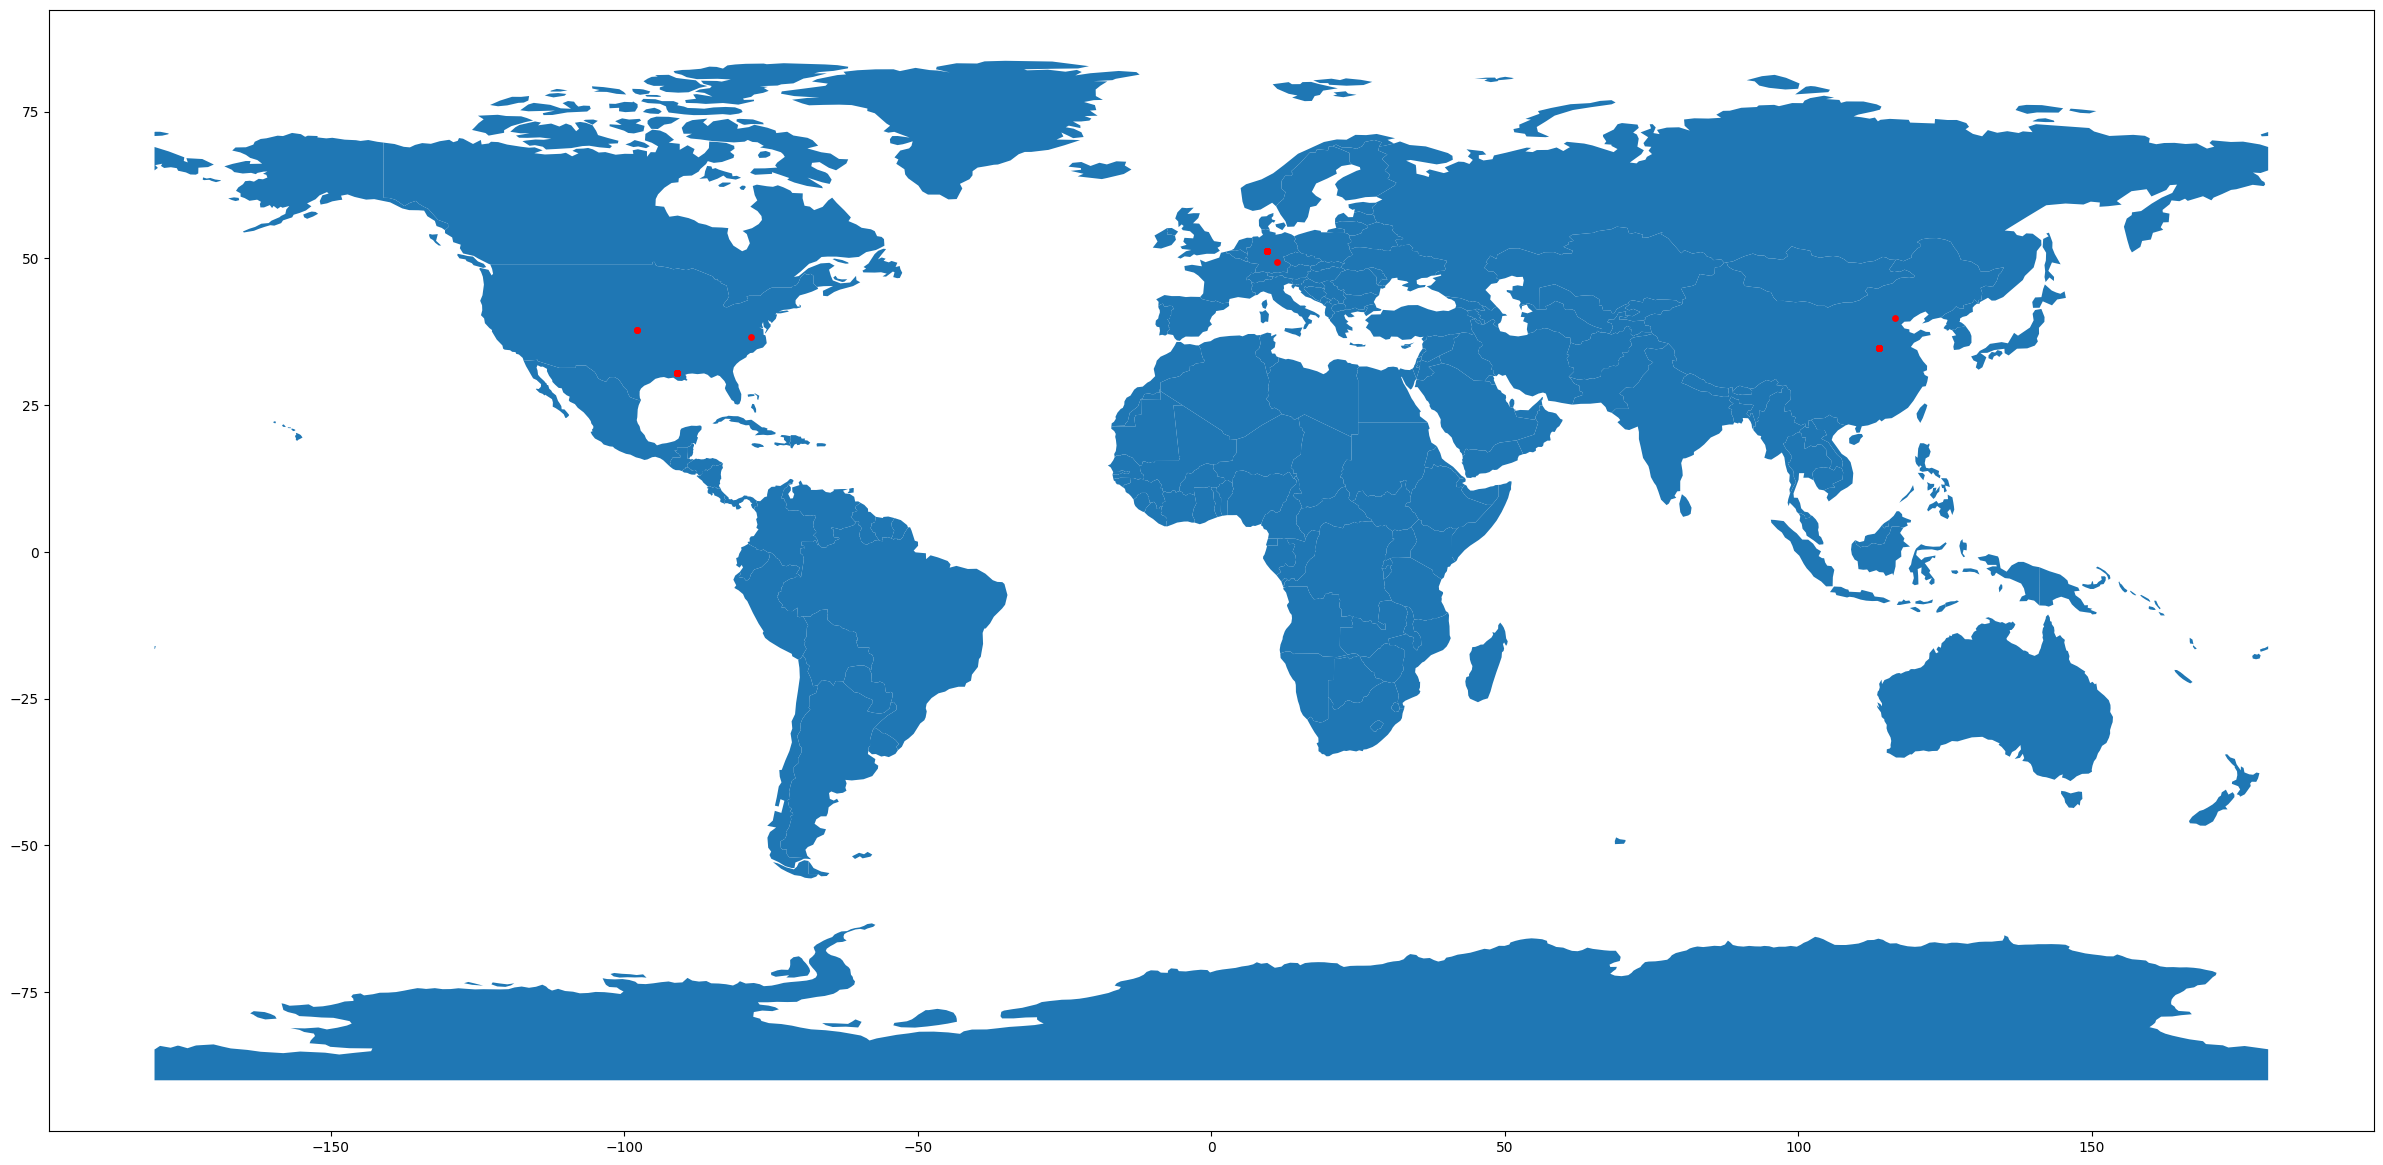

In [ ]:
geometry = [Point(xy) for xy in zip(new_df['longitude'], new_df['latitude'])]
gdf = GeoDataFrame(new_df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(30, 20)), marker='o', color='red', markersize=15)

In [ ]:
import plotly.express as px
import pandas as pd





#color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(new_df, 
                        lat="latitude", 
                        lon="longitude", 
                        zoom=8, 
                        height=800,
                        width=800,)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
#https://realpython.com/python-folium-web-maps-from-data/

In [ ]:
#https://www.youtube.com/watch?v=g4rY-dGkBw8

In [ ]:
import folium 

m=folium.Map(location=[30,10], tiles='OpenStreetMap', zoom_start=2)

In [ ]:
def geo_df_to_timestamped_geojson(geo_df, colour="blue", marker_type="LineString"):
   df = geo_df.copy()
   x_coords = df["geometry"].x.to_list()
   y_coords = df["geometry"].y.to_list()
   coordinate_list = [[x, y] for x, y in zip(x_coords, y_coords)]
   times_list = [i.isoformat() for i in df["timestamp"].to_list()]

   feature_list = [
       {
           "type": "Feature",
           "geometry": {
               "type": marker_type,
               "coordinates": coordinate_list,
           },
           "properties": {
               "times": times_list,
               "style": {
                   "color": colour,
                   "weight": 3,
               },
           },
       }
   ]

   return feature_list

In [ ]:
import folium 

m=folium.Map(location=[30,10], tiles='OpenStreetMap', zoom_start=2)

for i in range (0,len(new_df)):
  folium.Marker(location=[new_df.iloc[i]['latitude'], new_df.iloc[i]['longitude']],
                icon=folium.Icon(color="red"),
                popup= new_df.iloc[i]['ip']
                ).add_to(m)
                
  """folium.Marker(location=[new_df.iloc[i]['latitude']+10, new_df.iloc[i]['longitude']+2],
                      icon=folium.DivIcon(
                      icon_size=(150, 36),
                      icon_anchor=(7, 20),
                      html=f'<div style="font-size: 12pt;">{i}</div>'
   )).add_to(m)
              

  """              
                

In [ ]:
####
"""political_countries_url = (

    "http://geojson.xyz/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson"

)
folium.GeoJson(political_countries_url).add_to(m)"""
#folium.Choropleth(geo_data=political_countries_url,fill_color="RdYlGn_r").add_to(m)

In [ ]:
m

In [22]:
import pandas as pd
df = pd.read_csv("/content/dataset_big.csv", index_col=[0],low_memory=False)

In [23]:
new_df=df[['timestamp','ip','latitude','longitude']]

In [4]:
df['ip'].unique()

array(['124.251.100.130', '3.77.0.214', '183.84.6.233', '183.84.7.86',
       '18.195.249.137', '3.120.92.134', '188.34.184.4', '167.235.240.70',
       '17.57.163.28', '40.70.161.102', '17.57.146.57', '3.66.126.37',
       '3.121.131.36'], dtype=object)

In [ ]:
# how many unique IP?

len(df['ip'].unique())

13

In [91]:
#Which ips are not shown in the maps
showed_ips=["183.84.7.86",
"183.84.6.233",
"188.34.184.4",
"167.235.240.70",
"40.70.161.102",
"3.66.126.37",
"17.57.163.28"]
all_ips=list(df['ip'].unique())
differences= list(set(all_ips)-set(showed_ips))
differences

['124.251.100.130',
 '3.121.131.36',
 '3.120.92.134',
 '18.195.249.137',
 '17.57.146.57',
 '3.77.0.214']

In [92]:
differences= list(set(differences)-set(['3.121.131.36',
'17.57.146.57',
'124.251.100.130']))


In [99]:
differences= list(set(differences)-set(['3.120.92.134']))

In [100]:
#what is the cordinates of ips which arenot shown in the maps
test= df[df['ip'].isin(differences)][['latitude','longitude','ip']]
test

,latitude,longitude,ip
6,30.55435,-91.03677,3.77.0.214
7,30.55435,-91.03677,3.77.0.214
8,30.55435,-91.03677,3.77.0.214
9,30.55435,-91.03677,3.77.0.214
10,30.55435,-91.03677,3.77.0.214
...,...,...,...
160,30.55435,-91.03677,18.195.249.137
161,30.55435,-91.03677,18.195.249.137
162,30.55435,-91.03677,18.195.249.137
163,30.55435,-91.03677,18.195.249.137


In [101]:
#test
import folium 

m=folium.Map(location=[30,10], tiles='OpenStreetMap', zoom_start=2)

for i in range (0,len(test)):
  folium.Marker(location=[test.iloc[i]['latitude'], test.iloc[i]['longitude']],
                icon=folium.Icon(color="red"),
                popup= test.iloc[i]['ip']
                ).add_to(m)
                

In [102]:
m

# 3.121.131.36 # 3.120.92.134
#17.57.146.57
#124.251.100.130
#['3.120.92.134', '18.195.249.137', '3.77.0.214']

In [ ]:
type(new_df.loc[0,'timestamp'])

str

In [ ]:
new_df.loc[0,'timestamp']

'2023-04-11 13:28:26.742530'

In [ ]:
"""new_df['timestamp']=new_df['timestamp'].str[17:19]"""

<ipython-input-93-a4d612ab5b39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['timestamp']=new_df['timestamp'].str[17:19]


In [ ]:
#new_df['timestamp']=pd.to_datetime(new_df['timestamp'])

<ipython-input-66-542eb1a0adf0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['timestamp']=pd.to_datetime(new_df['timestamp'])


In [ ]:
type(new_df.loc[0,'timestamp'])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
new_df.columns

Index(['timestamp', 'ip', 'latitude', 'longitude'], dtype='object')

In [ ]:
new_df['timestamp']

0      2023-04-12 14:47:20.393059
1      2023-04-12 14:47:21.555213
2      2023-04-12 14:47:22.552368
3      2023-04-12 14:47:23.685441
4      2023-04-12 14:47:25.590595
                  ...            
478    2023-04-12 15:52:20.304534
479    2023-04-12 15:52:21.317533
480    2023-04-12 15:53:18.302317
481    2023-04-12 15:53:19.318565
482    2023-04-12 15:53:20.307954
Name: timestamp, Length: 483, dtype: object

In [ ]:
"""def geo_df_to_timestamped_geojson(geo_df, colour="blue"):
   df = geo_df.copy()
   x_coords = df["longitude"].to_list()
   y_coords = df["latitude"].to_list()
   coordinate_list = [[x, y] for x, y in zip(x_coords, y_coords)]
   times_list = [i.isoformat() for i in df["timestamp"].to_list()]

   feature_list = [
       {
           "type": "Feature",
           "geometry": {
               "type": "MultiPoint",
               "coordinates": coordinate_list,
           },
           "properties": {
               "times": times_list,
                'popup':"we will decide",
                 
                'icon': 'Marker', 
               "style": {
                   "color": colour,
                   "weight": 5,
               },
           },
       }
   ]

   return feature_list"""

In [ ]:
type(row['timestamp'])

str

In [ ]:
new_df=new_df.iloc[:300]

In [ ]:
len(new_df['ip'].unique())

13

In [7]:
new_df.columns

Index(['timestamp', 'ip', 'latitude', 'longitude'], dtype='object')

In [14]:
#adding noise

import numpy as np
new_df['latitude'] =  new_df['latitude'].apply(lambda x: x + np.random.uniform(-1,2)/10.0)
new_df['longitude'] =  new_df['longitude'].apply(lambda x: x + np.random.uniform(-1,2)/10.0)

<ipython-input-14-cf41c40f1f60>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['latitude'] =  new_df['latitude'].apply(lambda x: x + np.random.uniform(-1,2)/10.0)
<ipython-input-14-cf41c40f1f60>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['longitude'] =  new_df['longitude'].apply(lambda x: x + np.random.uniform(-1,2)/10.0)


In [27]:

def create_geojson_features(df):
    features = []
    
    for index, row in df.iterrows():
        feature = {
            'type': 'Feature',
            'geometry': {
                'type':'Point', 
                'coordinates':[row['longitude'],row['latitude']]
            },
            'properties': {
                'time': row['timestamp'],
                'icon': 'Marker',
                'popup': row['ip'],

                }
        }    
        features.append(feature)
    return features


In [ ]:
"""#first code
start_geojson=geo_df_to_timestamped_geojson(new_df)
geojson = {'type': 'FeatureCollection', 'features': start_geojson}
#start_geojson[0]"""

In [28]:
start_geojson= create_geojson_features(new_df)
geojson = {'type': 'FeatureCollection', 'features': start_geojson}
start_geojson[1]

{'type': 'Feature',
 'geometry': {'type': 'Point',
  'coordinates': [34.9458700021746, 113.74769374859868]},
 'properties': {'time': '2023-04-12 14:47:21.555213',
  'icon': 'Marker',
  'popup': '124.251.100.130'}}

In [29]:
from folium.plugins import TimestampedGeoJson
import folium 

nyc_map = folium.Map(location=[30,10], tiles='OpenStreetMap', zoom_start=2)
"""
TimestampedGeoJson(geojson,
                  period = 'PT1H',
                  duration = 'P1D',
                  transition_time = 1500,
                  add_last_point=True,
                  loop=True,
                  auto_play = True).add_to(nyc_map)
"""


TimestampedGeoJson(
    geojson,
    period='PT1M',
    add_last_point=True,
    auto_play=True,
    loop=True,
    max_speed=1,
    loop_button=True,
    date_options='YYYY-MM-DD HH:mm:ss',
).add_to(nyc_map)


"""TimestampedGeoJson(start_geojson
        , period='PT1H'
        , duration='PT1H'
        , auto_play=True
        , loop=True
        , max_speed=2
        , loop_button=True

         ,transition_time = 1500
        , date_options='YYYY/MM/DD HH:mm:ss'
        , time_slider_drag_update=False
    ).add_to(nyc_map)

  """

"TimestampedGeoJson(start_geojson\n        , period='PT1H'\n        , duration='PT1H'\n        , auto_play=True\n        , loop=True\n        , max_speed=2\n        , loop_button=True\n\n         ,transition_time = 1500\n        , date_options='YYYY/MM/DD HH:mm:ss'\n        , time_slider_drag_update=False\n    ).add_to(nyc_map)\n\n  "

In [30]:
nyc_map

In [3]:
df.columns

Index(['timestamp', 'ip', 'org', 'hostname', 'latitude', 'longitude',
       'picture'],
      dtype='object')

In [18]:
import folium 
from folium.plugins import HeatMap
df['count'] = df.groupby(['latitude','longitude']).cumcount() + 1
heat_data = [[row['latitude'],row['longitude'],row['count']] for index, row in df.iterrows()]
gmap = folium.Map(location=[38.00, -98.00], zoom_start = 10)
HeatMap(heat_data,radius=10).add_to(gmap)
#gmap.save("myfoliummap.html")



In [19]:
df['count']

0        1
1        2
2        3
3        4
4        5
      ... 
478    402
479    403
480    404
481    405
482    406
Name: count, Length: 483, dtype: int64

In [14]:
gmap

In [18]:
locations = new_df[['latitude', 'longitude']]
locationlist = locations.values.tolist()
len(locationlist)

483

In [26]:
map2 = folium.Map(location=[30, 10], tiles='CartoDB dark_matter', zoom_start=11)

#marker_cluster = folium.plugins.MarkerCluster().add_to(map2)

for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=new_df['ip'][point]).add_to(map2)
map2

In [25]:
map2 = folium.Map(location=[30, 10], tiles='CartoDB dark_matter', zoom_start=11)

marker_cluster = folium.plugins.MarkerCluster().add_to(map2)

for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=new_df['ip'][point]).add_to(marker_cluster)
map2

In [ ]:
"""import folium
from folium.plugins import TimestampedGeoJson
import pandas as pd

# Example dataset
data = {'lat': [37.7849, 37.973972, 38.77406, 39.774138],
        'lon': [-122.4194, -122.431297, -122.42853, -122.424876],
        'timestamp': [new_df['timestamp'][3], new_df['timestamp'][17], new_df['timestamp'][30], new_df['timestamp'][100]]}
df = pd.DataFrame(data)

# Convert data to GeoJSON format with timestamp
features = []
for index, row in df.iterrows():
    feature = {
        'type': 'Feature',
        'geometry': {
            'type':'Point',
            'coordinates':[row['lon'],row['lat']]
        },
        'properties': {
            'time': row['timestamp'],
            'icon': 'Marker'
        }
    }
    features.append(feature)
print(features[1])    
geojson = {'type': 'FeatureCollection', 'features': features}

# Create folium map object
m = folium.Map(location=[df['lat'].mean(), df['lon'].mean()], zoom_start=12)

# Add TimestampedGeoJson plugin to map
TimestampedGeoJson(
    geojson,
    period='PT1M',
    add_last_point=True,
    auto_play=True,
    loop=True,
    max_speed=1,
    loop_button=True,
    date_options='YYYY-MM-DD HH:mm:ss',
).add_to(m)

# Show map
m"""

In [ ]:
""start_geojson= create_geojson_features(new_df)
geojson = {'type': 'FeatureCollection', 'features': start_geojson}
start_geojson[1]""

{'type': 'Feature',
 'geometry': {'type': 'Multipoint', 'coordinates': [113.722, 34.7732]},
 'properties': {'times': '2023-04-12T14:47:21.555213',
  'icon': 'Marker',
  'popup': '124.251.100.130'}}